In [75]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')



In [76]:
from google.colab import files
uploaded = files.upload()

Saving SOL-USD.csv to SOL-USD.csv


In [77]:
import io
df = pd.read_csv("SOL-USD.csv", index_col=0, parse_dates=True)
df.shape
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-10,0.832005,1.313487,0.694187,0.951054,0.951054,87364276
2020-04-11,0.951054,1.049073,0.765020,0.776819,0.776819,43862444
2020-04-12,0.785448,0.956670,0.762426,0.882507,0.882507,38736897
2020-04-13,0.890760,0.891603,0.773976,0.777832,0.777832,18211285
2020-04-14,0.777832,0.796472,0.628169,0.661925,0.661925,16747614
...,...,...,...,...,...,...
2023-01-01,9.961036,10.052801,9.721011,9.982173,9.982173,194221164
2023-01-02,9.983222,11.372013,9.845211,11.272967,11.272967,558570124
2023-01-03,11.274727,13.500268,11.053267,13.344046,13.344046,1149255381


Text(0, 0.5, 'ETH-USD Açılış Fiyatları')

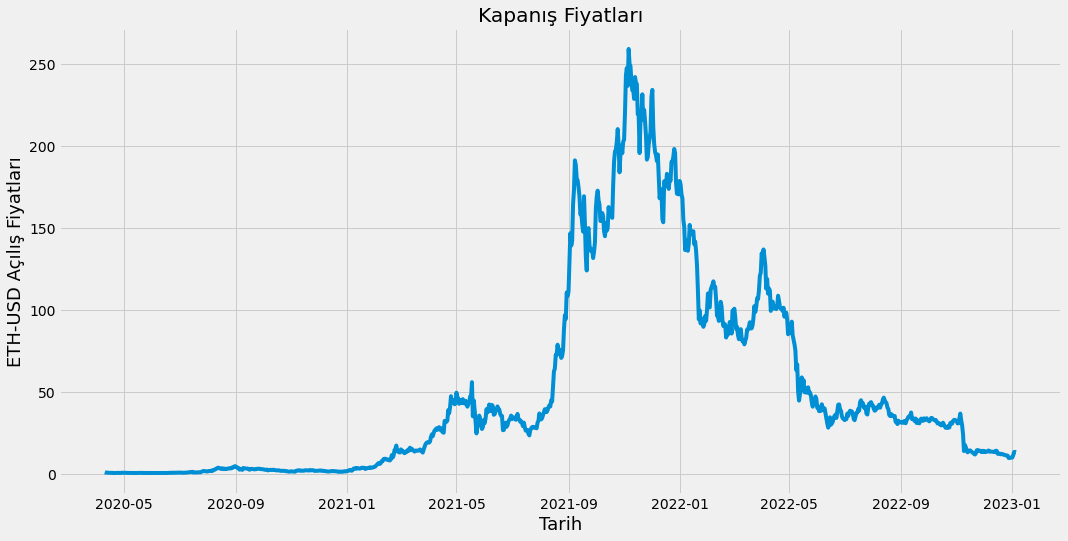

In [78]:
plt.figure(figsize=(16,8))
plt.title("Kapanış Fiyatları")
plt.plot(df['Close'])
plt.xlabel('Tarih', fontsize=18)
plt.ylabel('ETH-USD Açılış Fiyatları', fontsize=18)


In [79]:
data= df.filter(['Close'])
dataset= data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

801

In [80]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00168633],
       [0.0010121 ],
       [0.00142108],
       ...,
       [0.04964329],
       [0.04999569],
       [0.04902818]])

In [81]:
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([1.68633464e-03, 1.01210030e-03, 1.42107943e-03, 1.01602029e-03,
       5.67496856e-04, 5.08391307e-04, 6.79295888e-04, 5.62864844e-04,
       6.41682562e-04, 3.54834518e-04, 9.10884849e-05, 2.80110925e-04,
       6.82333589e-04, 4.34116597e-04, 4.60372401e-04, 4.95536217e-04,
       4.65263682e-04, 2.20955070e-04, 5.65051215e-04, 8.92221364e-04,
       6.80182045e-04, 8.26258736e-04, 7.76270161e-04, 6.35641986e-04,
       5.89035515e-04, 4.89762649e-04, 4.15259629e-04, 3.78087447e-04,
       3.46913275e-04, 3.45384750e-04, 8.42081872e-05, 0.00000000e+00,
       9.01752395e-05, 1.36441178e-04, 2.08363119e-04, 1.72119662e-04,
       3.24461370e-04, 3.78130014e-04, 5.31682933e-04, 4.22495937e-04,
       2.47207005e-04, 3.62364922e-04, 4.78300646e-04, 3.78292540e-04,
       1.30717916e-04, 3.31183011e-04, 2.24573224e-04, 2.92981493e-04,
       2.31724400e-04, 2.48209253e-04, 2.81171218e-04, 2.11861313e-04,
       2.40779460e-04, 1.91146897e-04, 2.76094193e-04, 2.78717839e-04,
     

In [82]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [83]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

(741, 60, 1)


In [84]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [85]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [86]:
model.fit(x_train,y_train, batch_size=1,epochs=5)

Epoch 1/5
741/741 [==============================] - 23s 26ms/step - loss: 0.0041
Epoch 2/5
741/741 [==============================] - 19s 26ms/step - loss: 0.0020
Epoch 3/5
741/741 [==============================] - 19s 26ms/step - loss: 0.0013
Epoch 4/5
741/741 [==============================] - 20s 27ms/step - loss: 0.0016
Epoch 5/5
741/741 [==============================] - 20s 27ms/step - loss: 0.0010


In [87]:
test_data = scaled_data[training_data_len - 60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for y in range(60,len(test_data)):
  x_test.append(test_data[y-60:y,0])
  

In [88]:
x_test = np.array(x_test)

In [89]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [90]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

7/7 [==============================] - 1s 16ms/step


In [91]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

5.075403176354981

<ipython-input-92-87bcbd9c370a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Tahminler'] = predictions


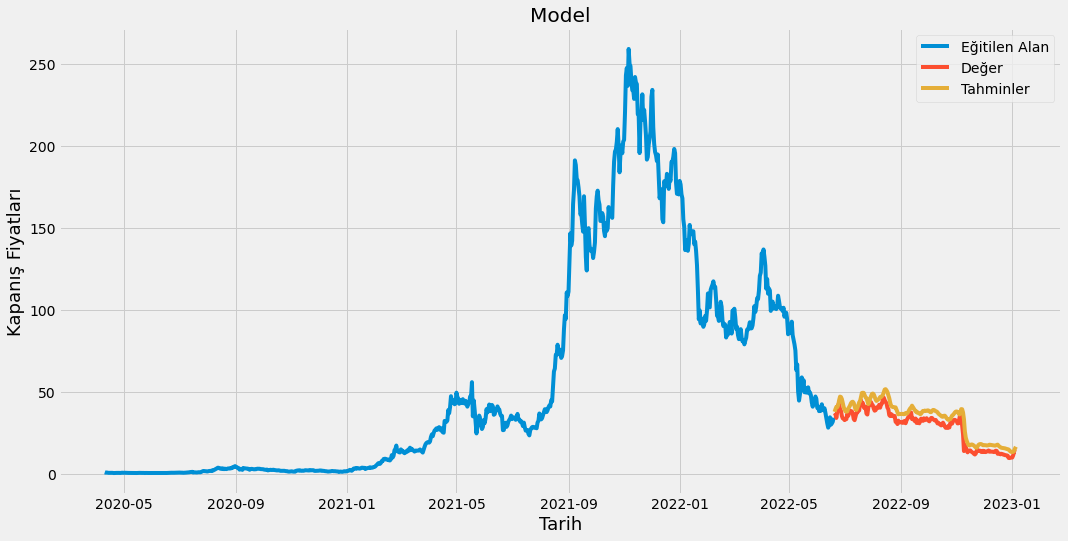

                Close  Tahminler
Date                            
2022-06-20  35.417114  37.855171
2022-06-21  36.121159  39.518227
2022-06-22  34.121635  40.879818
2022-06-23  38.175232  40.698147
2022-06-24  42.212048  41.986496
...               ...        ...
2023-01-01   9.982173  13.381638
2023-01-02  11.272967  13.437962
2023-01-03  13.344046  14.039142
2023-01-04  13.435113  15.430167
2023-01-05  13.185089  16.561728

[200 rows x 2 columns]


In [92]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Tahminler'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Tarih',fontsize=18)
plt.ylabel('Kapanış Fiyatları',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Tahminler']])
plt.legend(['Eğitilen Alan','Değer','Tahminler'])
plt.show()
print(valid)